Chargement et exploration des données

Affichage de 20 lignes aléatoires :


,target,ids,date,flag,user,text
73358,0,1694487089,Mon May 04 02:51:03 PDT 2009,NO_QUERY,allyeezy,tssss! im feelin like im about to let go.
1081455,4,1968464398,Fri May 29 21:29:36 PDT 2009,NO_QUERY,FadingLullabies,@nevershoutnneka haha well thats good
1170101,4,1980331756,Sun May 31 06:25:48 PDT 2009,NO_QUERY,cdgriffi,@abednego_jones I'm STILL laughing at ur fooli...
192698,0,1969903053,Sat May 30 01:40:05 PDT 2009,NO_QUERY,siobhanyy,i miss the suspense of waiting for the harry ...
221685,0,1976875249,Sat May 30 19:23:38 PDT 2009,NO_QUERY,houshuang,"When I was studying Chinese in Sweden, they ne..."
105273,0,1822935168,Sat May 16 20:43:44 PDT 2009,NO_QUERY,Galley99,"MADtv is gone. RIP, and thanks for all the lau..."
1515500,4,2175608742,Mon Jun 15 01:28:29 PDT 2009,NO_QUERY,ggw_bach,@osanewsletter everything has a twinkling frac...
223805,0,1977274201,Sat May 30 20:33:32 PDT 2009,NO_QUERY,Diamondz95,Too bad Cavs
1383039,4,2052524051,Sat Jun 06 01:01:38 PDT 2009,NO_QUERY,heymiks,"@annevdns haha yup, that was around 1981 i thi..."
834537,4,1557981462,Sun Apr 19 06:49:23 PDT 2009,NO_QUERY,Lavetta,@sillycows thanks for the follow friday mention


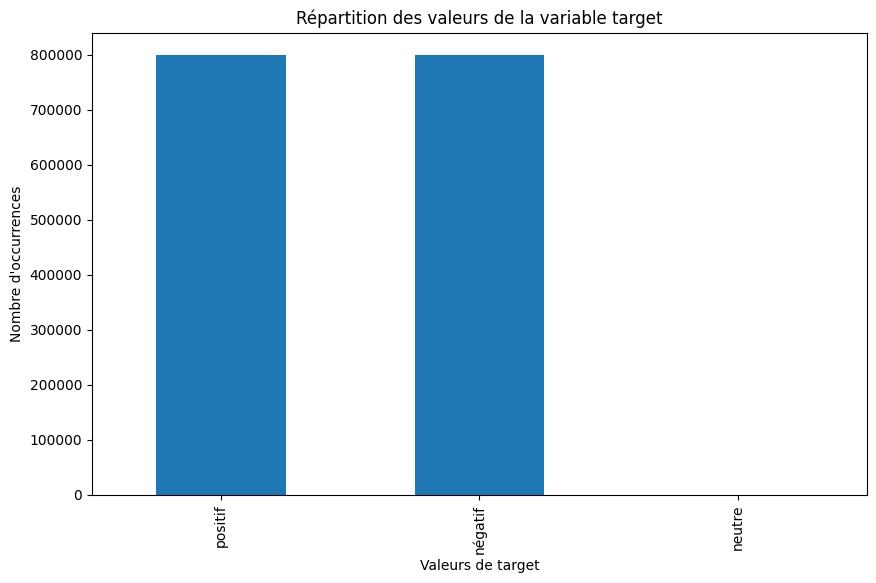

Statistiques descriptives :


,target,ids,date,flag,user,text
count,1600018,1600018,1600018,1600018,1600018,1600018
unique,3,1598316,774364,2,659776,1581467
top,positif,ids,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,800000,18,20,1600000,549,210


Valeurs manquantes par colonne :


target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Chemin du fichier
file_path = 'Dataset_Init.csv'

# Les titres que vous souhaitez ajouter
headers = ["target", "ids", "date", "flag", "user", "text"]

# Lire les données existantes
with open(file_path, "r", encoding="utf-8") as file:
    data = file.readlines()

# Écrire les titres et ajouter les anciennes données
with open(file_path, "w", encoding="utf-8") as file:
    # Ajouter les titres
    file.write(",".join(headers) + "\n")
    # Ajouter les anciennes données
    file.writelines(data)

# Spécifiez les types de données pour les colonnes 0 et 1
dtype_spec = {
    "target": 'str',
    "ids": 'str'
}

# Lire le fichier CSV avec les types de données spécifiés
df = pd.read_csv(file_path, dtype=dtype_spec, low_memory=False)

# Sélectionner 20 lignes aléatoires
random_rows = df.sample(n=20)

# Afficher les lignes sélectionnées
print("Affichage de 20 lignes aléatoires :")
display(random_rows)

# Regroupement des valeurs de la colonne 'target' en catégories
df['target'] = df['target'].apply(lambda x: 'positif' if x == '4' else 'négatif' if x == '0' else 'neutre')

# Assurez-vous que toutes les catégories sont présentes
df['target'] = pd.Categorical(df['target'], categories=['positif', 'négatif', 'neutre'])

# Compter les occurrences de chaque valeur dans la colonne 'target'
target_counts = df['target'].value_counts()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
ax = target_counts.plot(kind='bar')
plt.title('Répartition des valeurs de la variable target')
plt.xlabel('Valeurs de target')
plt.ylabel('Nombre d\'occurrences')

# Modifier les noms des colonnes en abscisse
ax.set_xticklabels(['positif', 'négatif', 'neutre'])

plt.show()

# Afficher les statistiques descriptives
print("Statistiques descriptives :")
display(df.describe(include='all'))

# Afficher les valeurs manquantes
print("Valeurs manquantes par colonne :")
display(df.isnull().sum())

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Spécifier les types de données des colonnes
dtype_spec = {
    "target": 'str',
    "ids": 'str'
}

# Charger le fichier CSV dans un DataFrame avec les types de données spécifiés
df = pd.read_csv('Dataset_Init.csv', dtype=dtype_spec, low_memory=False)

# Convertir la colonne 'target' en type string
df['target'] = df['target'].astype(str)

# Diviser le DataFrame en 132 000 lignes tout en maintenant l'équilibre de la colonne 'target'
df_sampled, _ = train_test_split(df, train_size=132000, stratify=df['target'], random_state=42)

# Afficher les premières lignes du DataFrame échantillonné
display(df_sampled.head())

,target,ids,date,flag,user,text
234187,0,1979529677,Sun May 31 03:26:34 PDT 2009,NO_QUERY,archnix,bad weather !!
794126,0,2326866322,Thu Jun 25 07:36:53 PDT 2009,NO_QUERY,jill777,@DonnieWahlberg Morning! Will you @jasonjmikem...
605910,0,2222409635,Thu Jun 18 06:56:40 PDT 2009,NO_QUERY,jdillon05,Headed to the Beach for my last full day on th...
24337,0,1557961813,Sun Apr 19 06:44:42 PDT 2009,NO_QUERY,theGreener,"Lost to the scum, depressed now"
294816,0,1996693840,Mon Jun 01 15:31:26 PDT 2009,NO_QUERY,arythmaticflow,@starlaboob Well that sucks.


Prétraitement, Word2Vec, FastText

In [4]:
import pandas as pd
import emoji
import contractions
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
import numpy as np

# Configuration initiale
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialisation des outils
stop_words = set(stopwords.words('english'))
stop_words -= {'no', 'not', 'nor', 'none', 'never', 'nothing', 'nowhere', 'hardly', 'barely', 'scarcely'}
lemmatizer = WordNetLemmatizer()
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    """Prétraitement unifié pour tous les modèles"""
    if pd.isna(text):
        return []
        
    # Conversion des emojis en texte
    text = emoji.demojize(text)
    
    # Expansion des contractions
    text = contractions.fix(text)
    
    # Nettoyage des URLs, mentions et hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', 'URL', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+', 'mention', text)
    text = re.sub(r'\#(\w+)', r'\1', text)
    
    # Gestion des répétitions de lettres
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    # Tokenisation
    tokens = tweet_tokenizer.tokenize(text)
    
    # Nettoyage et normalisation
    tokens = [token for token in tokens if (
        token not in stop_words and
        len(token) > 1 and
        not token.isnumeric()
    )]
    
    # Lemmatisation avec POS tagging
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) 
             for token in tokens]
    
    return tokens

# Prétraitement du DataFrame
print("Prétraitement des tweets...")
df_sampled['cleaned_text'] = df_sampled['text'].apply(clean_text)
df_sampled['cleaned_text_str'] = df_sampled['cleaned_text'].apply(' '.join)

# Word2Vec
print("\nCréation des embeddings Word2Vec...")
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=df_sampled['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)
df_sampled['w2v'] = df_sampled['cleaned_text'].apply(
    lambda x: model_w2v.wv[x].mean(axis=0) if len(x) > 0 else np.zeros(100)
)

# FastText
print("\nCréation des embeddings FastText...")
from gensim.models import FastText
model_fasttext = FastText(sentences=df_sampled['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)
df_sampled['fasttext'] = df_sampled['cleaned_text'].apply(
    lambda x: model_fasttext.wv[x].mean(axis=0) if len(x) > 0 else np.zeros(100)
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Prétraitement des tweets...

Création des embeddings Word2Vec...

Création des embeddings FastText...


Bert

In [6]:
print("\nCréation des embeddings BERT...")
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model_bert(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Initialiser une liste pour stocker les embeddings
bert_embeddings = []

# Utiliser une boucle for pour itérer sur les textes
for text in df_sampled['cleaned_text_str']:
    embedding = get_bert_embeddings(text).flatten()
    bert_embeddings.append(embedding)

# Ajouter les embeddings au DataFrame
df_sampled['bert'] = bert_embeddings


Création des embeddings BERT...


Use

In [8]:
print("\nCréation des embeddings USE...")
import tensorflow_hub as hub

model_use = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")

def get_use_embeddings(text):
    return model_use([text]).numpy()[0]

# Initialiser une liste pour stocker les embeddings
use_embeddings = []

# Utiliser une boucle for pour itérer sur les textes
for text in df_sampled['cleaned_text_str']:
    embedding = get_use_embeddings(text)
    use_embeddings.append(embedding)

# Ajouter les embeddings au DataFrame
df_sampled['use'] = use_embeddings


Création des embeddings USE...



Glove

In [10]:
print("\nCréation des embeddings GloVe...")
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import numpy as np

glove_input_file = '../glove.6B.100d.txt'
word2vec_output_file = '../glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
model_glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Construire un dictionnaire des vecteurs pour les mots utilisés
vocab = set(word for tokens in df_sampled['cleaned_text'] for word in tokens)
word_vectors = {word: model_glove[word] for word in vocab if word in model_glove}

def get_glove_embeddings(tokens):
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# Initialiser une liste pour stocker les embeddings
glove_embeddings = []

# Utiliser une boucle for pour itérer sur les textes
for tokens in df_sampled['cleaned_text']:
    embedding = get_glove_embeddings(tokens)
    glove_embeddings.append(embedding)

# Ajouter les embeddings au DataFrame
df_sampled['glove'] = glove_embeddings


Création des embeddings GloVe...


C:\Users\creus\AppData\Local\Temp\ipykernel_13256\2350692942.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


Affichage des statistiques

In [11]:
print("\nStatistiques des embeddings :")
print(f"Dimension Word2Vec : {df_sampled['w2v'].iloc[0].shape}")
print(f"Dimension FastText : {df_sampled['fasttext'].iloc[0].shape}")
print(f"Dimension BERT : {df_sampled['bert'].iloc[0].shape}")
print(f"Dimension USE : {df_sampled['use'].iloc[0].shape}")
print(f"Dimension GloVe : {df_sampled['glove'].iloc[0].shape}")


Statistiques des embeddings :
Dimension Word2Vec : (100,)
Dimension FastText : (100,)
Dimension BERT : (768,)
Dimension USE : (512,)
Dimension GloVe : (100,)


Évaluation des performances via ARI et t-SNE

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Utilisation de la variable target comme étiquettes
true_labels = df_sampled['target'].astype('category').cat.codes

# Convertir les colonnes d'embeddings en numpy arrays
w2v_embeddings = np.vstack(df_sampled['w2v'].values)
bert_embeddings = np.vstack(df_sampled['bert'].values)
use_embeddings = np.vstack(df_sampled['use'].values)
glove_embeddings = np.vstack(df_sampled['glove'].values)
fasttext_embeddings = np.vstack(df_sampled['fasttext'].values)

# Normaliser les embeddings
scaler = StandardScaler()
w2v_embeddings_scaled = scaler.fit_transform(w2v_embeddings)
bert_embeddings_scaled = scaler.fit_transform(bert_embeddings)
use_embeddings_scaled = scaler.fit_transform(use_embeddings)
glove_embeddings_scaled = scaler.fit_transform(glove_embeddings)
fasttext_embeddings_scaled = scaler.fit_transform(fasttext_embeddings)

# Clustering avec KMeans sur les embeddings normalisés
n_clusters = len([label for label in np.unique(true_labels) if np.sum(true_labels == label) > 0])
kmeans_w2v = KMeans(n_clusters=n_clusters, random_state=42).fit(w2v_embeddings_scaled)
kmeans_bert = KMeans(n_clusters=n_clusters, random_state=42).fit(bert_embeddings_scaled)
kmeans_use = KMeans(n_clusters=n_clusters, random_state=42).fit(use_embeddings_scaled)
kmeans_glove = KMeans(n_clusters=n_clusters, random_state=42).fit(glove_embeddings_scaled)
kmeans_fasttext = KMeans(n_clusters=n_clusters, random_state=42).fit(fasttext_embeddings_scaled)

# Exemple d'évaluation avec ARI
ari_w2v = adjusted_rand_score(true_labels, kmeans_w2v.labels_)
ari_bert = adjusted_rand_score(true_labels, kmeans_bert.labels_)
ari_use = adjusted_rand_score(true_labels, kmeans_use.labels_)
ari_glove = adjusted_rand_score(true_labels, kmeans_glove.labels_)
ari_fasttext = adjusted_rand_score(true_labels, kmeans_fasttext.labels_)

print(f"ARI Word2Vec: {ari_w2v}")
print(f"ARI BERT: {ari_bert}")
print(f"ARI USE: {ari_use}")
print(f"ARI GloVe: {ari_glove}")
print(f"ARI FastText: {ari_fasttext}")

# Visualisation avec t-SNE
def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

# Exemple de visualisation
plot_tsne(w2v_embeddings, true_labels, 't-SNE Word2Vec')
plot_tsne(bert_embeddings, true_labels, 't-SNE BERT')
plot_tsne(use_embeddings, true_labels, 't-SNE USE')
plot_tsne(glove_embeddings, true_labels, 't-SNE GloVe')
plot_tsne(fasttext_embeddings, true_labels, 't-SNE FastText')

ARI Word2Vec: 0.019832332914912425
ARI BERT: 0.001979563432992251
ARI USE: 0.014538971106932965
ARI GloVe: 0.01639511822337138
ARI FastText: 0.012297437952628078


Tests de 3 modèles via MLFlow

Initialisation MLFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow
import mlflow.tensorflow
import pandas as pd
import numpy as np

Loading and Preprocessing Data

In [ ]:
# Utilisation des embeddings USE de df_sampled
X = np.vstack(df_sampled['use'].values)
y = df_sampled['target'].values

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initializing MLFlow

In [ ]:
# Initialize MLFlow
mlflow.set_experiment("Experimentation_projet_7")

Logistic Regression Model

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow

# Convertir d'abord les étiquettes en numérique si elles sont en string
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Convertir les étiquettes 4 en 1
y_train = np.where(y_train == 4, 1, 0)  # Convertit explicitement en binaire 0/1
y_test = np.where(y_test == 4, 1, 0)    # Convertit explicitement en binaire 0/1

# Modèle de Régression Logistique
with mlflow.start_run(run_name="Logistic_Regression_USE"):
    model_lr = LogisticRegression(random_state=42)
    model_lr.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement
    y_pred_lr = model_lr.predict(X_train)
    y_pred_proba_lr = model_lr.predict_proba(X_train)[:, 1]  # Probabilités pour la classe positive
    
    # Calcul des métriques
    f1_lr = f1_score(y_train, y_pred_lr)
    precision_lr = precision_score(y_train, y_pred_lr)
    recall_lr = recall_score(y_train, y_pred_lr)
    auc_lr = roc_auc_score(y_train, y_pred_proba_lr)
    
    # Logging des métriques dans MLflow
    mlflow.log_metric("f1_score", f1_lr)
    mlflow.log_metric("precision", precision_lr)
    mlflow.log_metric("recall", recall_lr)
    mlflow.log_metric("auc", auc_lr)
    
    # Sauvegarde du modèle
    mlflow.sklearn.log_model(model_lr, "model")

LSTM Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow

# Conversion des étiquettes en format binaire 0/1
y_train_lstm = np.where(y_train == 4, 1, 0)
y_test_lstm = np.where(y_test == 4, 1, 0)

# LSTM Model
with mlflow.start_run(run_name="LSTM"):
    # Définition du modèle
    model_lstm = Sequential([
        Embedding(5000, 100, weights=[embedding_matrix], input_length=100, trainable=False),
        SpatialDropout1D(0.2),
        LSTM(100, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    
    # Compilation du modèle
    model_lstm.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    # Callback pour early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )
    
    # Entraînement du modèle
    history = model_lstm.fit(
        X_train,
        y_train_lstm,
        epochs=10,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Prédictions
    y_pred_proba = model_lstm.predict(X_test)
    y_pred_lstm = (y_pred_proba > 0.5).astype("int32")
    
    # Calcul des métriques
    f1_lstm = f1_score(y_test_lstm, y_pred_lstm)
    precision_lstm = precision_score(y_test_lstm, y_pred_lstm)
    recall_lstm = recall_score(y_test_lstm, y_pred_lstm)
    auc_lstm = roc_auc_score(y_test_lstm, y_pred_proba)
    
    # Logging des paramètres
    mlflow.log_param("num_words", 5000)
    mlflow.log_param("embedding_dim", 100)
    mlflow.log_param("maxlen", 100)
    mlflow.log_param("lstm_units", 100)
    mlflow.log_param("dropout_rate", 0.2)
    
    # Logging des métriques
    mlflow.log_metric("f1_score", f1_lstm)
    mlflow.log_metric("precision", precision_lstm)
    mlflow.log_metric("recall", recall_lstm)
    mlflow.log_metric("auc", auc_lstm)
    
    # Logging des métriques d'entraînement
    for epoch, (loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
        mlflow.log_metric(f"train_loss_epoch_{epoch+1}", loss)
        mlflow.log_metric(f"val_loss_epoch_{epoch+1}", val_loss)
    
    # Sauvegarde du modèle au format HDF5
    model_lstm.save("model_lstm.h5")
    mlflow.log_artifact("model_lstm.h5")

In [ ]:
import tensorflow as tf
import numpy as np

# Define the model architecture
new_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(512,), name='input_layer_2'),
    tf.keras.layers.Embedding(
        input_dim=5000,  # Vocabulary size
        output_dim=100,  # Embedding dimension
        name='embedding_3'
    ),
    tf.keras.layers.SpatialDropout1D(0.3, name='spatial_dropout1d_3'),
    tf.keras.layers.LSTM(100, name='lstm_3'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='dense_7')
])

# Load the original model
original_model = tf.keras.models.load_model('model_lstm.h5')

# Copy the weights from the original model to the new model
for i in range(len(original_model.layers)):
    try:
        new_model.layers[i].set_weights(original_model.layers[i].get_weights())
    except Exception as e:
        print(f"Error copying weights for layer {i}: {str(e)}")

# Compile the model
new_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Save the new model in the recommended Keras format
new_model.save("model_lstm_compatible.h5")

# Verify that the model has been saved correctly
test_model = tf.keras.models.load_model('model_lstm_compatible.keras')
print("New model created and saved successfully!")

# Display the summary of the new model for verification
test_model.summary()

In [ ]:
import tensorflow as tf

# Charger votre modèle
model = tf.keras.models.load_model('model_lstm.h5')

# Afficher la structure du modèle
model.summary()

BERT Model

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow
import numpy as np
import os

# Désactiver la journalisation automatique de mlflow.tensorflow
mlflow.tensorflow.autolog(disable=True)

# Conversion des étiquettes en format binaire 0/1
y_train_bert = np.where(y_train == 4, 1, 0)
y_test_bert = np.where(y_test == 4, 1, 0)

# Démarrer une session MLflow
with mlflow.start_run(run_name="BERT_approach_fast"):
    # Charger le tokenizer et le modèle de base BERT
    tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
    
    # Convertir les données en liste de strings si ce n'est pas déjà le cas
    if isinstance(X_train[0], str):
        X_train_texts = X_train[:1000]  # Limiter à 1000 échantillons pour l'entraînement
        X_test_texts = X_test[:200]     # Limiter à 200 échantillons pour le test
    else:
        X_train_texts = [str(text) for text in X_train[:1000]]
        X_test_texts = [str(text) for text in X_test[:200]]
    
    # Ajuster les labels en conséquence
    y_train_bert = y_train_bert[:1000]
    y_test_bert = y_test_bert[:200]
    
    # Tokenizer avec une longueur maximale réduite
    train_encodings = tokenizer_bert(
        X_train_texts, 
        truncation=True, 
        padding=True, 
        max_length=128,  # Réduit de 512 à 128
        return_tensors="tf"
    )
    test_encodings = tokenizer_bert(
        X_test_texts, 
        truncation=True, 
        padding=True, 
        max_length=128,  # Réduit de 512 à 128
        return_tensors="tf"
    )

    # Augmenter la taille du batch pour plus de rapidité
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        y_train_bert
    )).batch(32)  # Augmenté de 16 à 32

    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),
        y_test_bert
    )).batch(32)  # Augmenté de 16 à 32

    class BertClassifier(tf.keras.Model):
        def __init__(self, bert_model):
            super().__init__()
            self.bert = bert_model
            self.dropout = tf.keras.layers.Dropout(0.1)
            self.classifier = Dense(1, activation='sigmoid')
            
        def call(self, inputs, training=False):
            input_ids = tf.cast(inputs['input_ids'], tf.int32)
            attention_mask = tf.cast(inputs['attention_mask'], tf.int32)
            
            outputs = self.bert(
                input_ids=input_ids, 
                attention_mask=attention_mask,
                training=False
            )
            
            pooled_output = outputs[1]
            pooled_output = self.dropout(pooled_output, training=training)
            return self.classifier(pooled_output)

    base_model = TFBertModel.from_pretrained('bert-base-uncased')
    model_bert = BertClassifier(base_model)

    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)  # Légèrement augmenté
    loss = tf.keras.losses.BinaryCrossentropy()
    metrics = [tf.keras.metrics.BinaryAccuracy(name="accuracy")]  # Réduit le nombre de métriques

    model_bert.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=1,  # Réduit de 2 à 1
        restore_best_weights=True
    )

    history = model_bert.fit(
        train_dataset,
        epochs=2,  # Réduit de 3 à 2
        validation_data=test_dataset,
        callbacks=[early_stopping]
    )

    y_pred_proba = model_bert.predict(test_dataset, batch_size=32).ravel()
    y_pred_bert = (y_pred_proba > 0.5).astype("int32")

    # Calculer les métriques finales
    f1_bert = f1_score(y_test_bert, y_pred_bert)
    precision_bert = precision_score(y_test_bert, y_pred_bert)
    recall_bert = recall_score(y_test_bert, y_pred_bert)
    auc_bert = roc_auc_score(y_test_bert, y_pred_proba)

    # Logger les métriques et paramètres
    mlflow.log_param("model_type", "BERT_fast")
    mlflow.log_param("max_length", 128)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 2)
    mlflow.log_param("training_samples", 1000)
    mlflow.log_param("test_samples", 200)

    mlflow.log_metric("f1_score", f1_bert)
    mlflow.log_metric("precision", precision_bert)
    mlflow.log_metric("recall", recall_bert)
    mlflow.log_metric("auc", auc_bert)

    weights_path = "bert_model_weights.weights.h5"
    model_bert.save_weights(weights_path)
    if os.path.exists(weights_path):
        mlflow.log_artifact(weights_path)
        os.remove(weights_path)